<a href="https://colab.research.google.com/github/Parkseoho/DAStudy-sun2/blob/main/kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.1 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns


import koreanize_matplotlib

# df = pd.read_csv(r"C:\Users\shpark\Desktop\archive\shopping_trends_updated.csv")
df = pd.read_csv('/content/shopping_trends_updated.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
# null값은 모든 칼럼이 없음
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

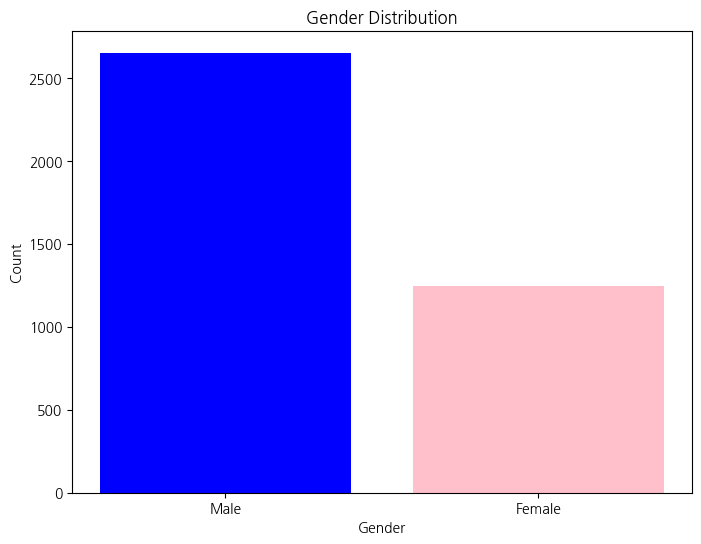

In [ ]:
df2 = df['Gender'].value_counts().reset_index().rename(columns={'index':'Gender','Gender':'count'})

plt.figure(figsize=(8, 6))
plt.bar( df2['Gender'],df2['count'], color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

## Age칼럼을 연령대로 분류

In [ ]:
df['Age_change'] = ''
def age_change(data):
    data.loc[data['Age'] < 20, 'Age_change'] = 1
    data.loc[(data['Age'] >= 20) & (data['Age'] < 30), 'Age_change'] = 2
    data.loc[(data['Age'] >= 30) & (data['Age'] < 40), 'Age_change'] = 3
    data.loc[(data['Age'] >= 40) & (data['Age'] < 50), 'Age_change'] = 4
    data.loc[(data['Age'] >= 50) & (data['Age'] < 60), 'Age_change'] = 5
    data.loc[(data['Age'] >= 60), 'Age_change'] = 6

age_change(df)
# gender_change = {"Male":1,"Female":2}
# df['Gender'] = df['Gender'].replace(gender_change)

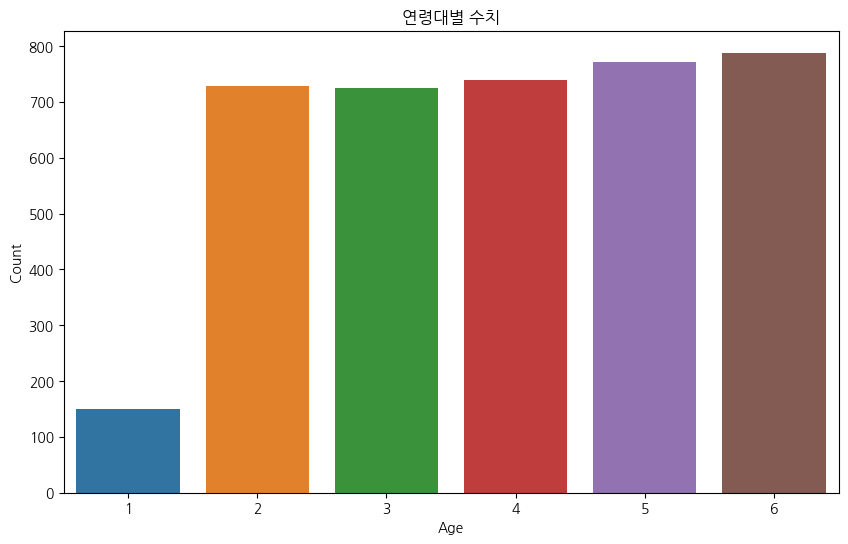

In [ ]:
# 쇼핑몰에 20세 이하 방문자는 적으며 대부분의 방문자의 연령대 비유은 비슷
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_change')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('연령대별 수치')
plt.show()

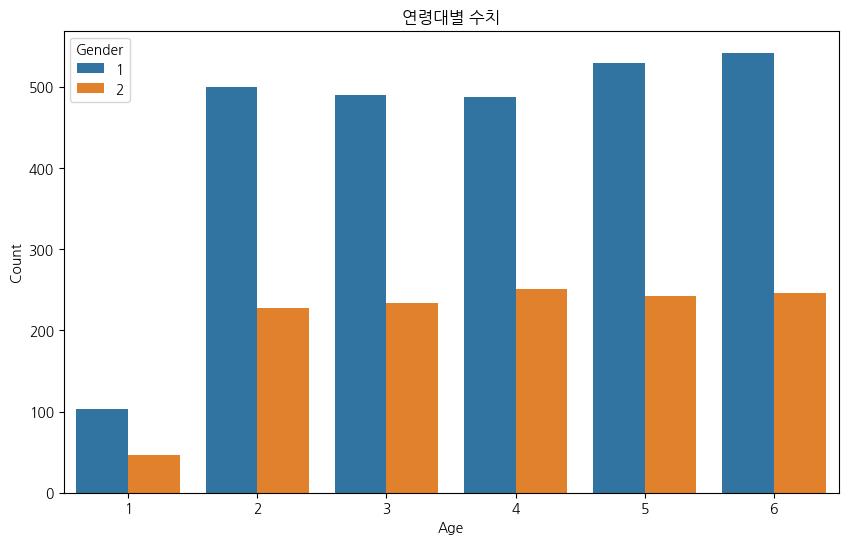

In [ ]:
# 연령별 성비의 비율 비슷
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_change',hue='Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('연령대별 수치')
plt.show()

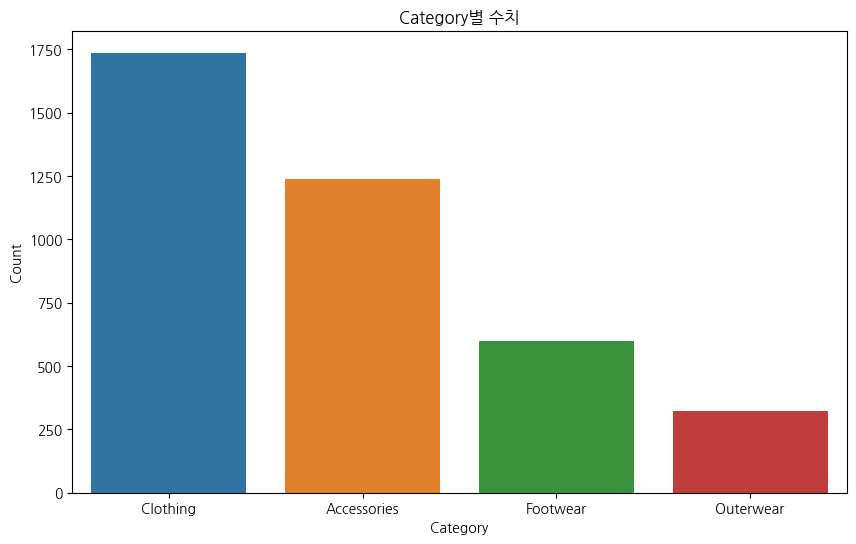

In [ ]:
# 쇼핑몰의 카테고리는 Clothing가 상위권 차지
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category',order=df['Category'].value_counts().index)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category별 수치')
plt.show()

In [ ]:
# 결제 방식의 비율은 비슷
df['Payment Method'].value_counts(normalize=True)

PayPal           0.173590
Credit Card      0.172051
Cash             0.171795
Debit Card       0.163077
Venmo            0.162564
Bank Transfer    0.156923
Name: Payment Method, dtype: float64

In [ ]:
# 결제주기 비율 비슷
df['Frequency of Purchases'].value_counts(normalize=True)

Every 3 Months    0.149744
Annually          0.146667
Quarterly         0.144359
Monthly           0.141795
Bi-Weekly         0.140256
Fortnightly       0.138974
Weekly            0.138205
Name: Frequency of Purchases, dtype: float64

In [ ]:
np.quantile(df['Previous Purchases'],0.75)

38.0

In [ ]:
# 이전구매가 상위 75% 보다 높은 수치면 재구매 high
# 이전구매가 상위 50% 보다 높고 75%보다 낮으면 수치면 재구매 normal
# 이전구매가 상위 50% 보다낮으면 수치면 재구매 low

df['재구매'] = ''

# 조건에 따라 '재구매' 값을 설정
df.loc[df['Previous Purchases'] >= np.quantile(df['Previous Purchases'], 0.75), '재구매'] = 'high'
df.loc[(df['Previous Purchases'] >= np.quantile(df['Previous Purchases'], 0.5)) & (df['Previous Purchases'] < np.quantile(df['Previous Purchases'], 0.75)), '재구매'] = 'normal'
df.loc[df['Previous Purchases'] < np.quantile(df['Previous Purchases'], 0.5), '재구매'] = 'low'

## 성별 별 칼럼 분석

In [ ]:
# 남성이 여성에비해 약 2배정도많음
df['Gender'].value_counts(normalize=True)

Male      0.68
Female    0.32
Name: Gender, dtype: float64

In [ ]:
# 성별 1인당 구매금액은 거의 동일
amount = df.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()
Gender_count = df.Gender.value_counts().reset_index().rename(columns={'Gender':'count',"index":'Gender'})
amount_com = amount.merge(Gender_count, on='Gender',how='inner')
amount_com['1인당 구매 금액'] = amount_com['Purchase Amount (USD)']/amount_com['count']
amount_com

,Gender,Purchase Amount (USD),count,1인당 구매 금액
0,Female,75191,1248,60.249199
1,Male,157890,2652,59.536199


In [ ]:
# 성별 리뷰 점수는 비슷
df.groupby('Gender')['Review Rating'].mean().reset_index()

,Gender,Review Rating
0,Female,3.741426
1,Male,3.753959


In [ ]:
# 성별 Shipping Type의 경우 서로 정반대의 형태를 가지고 있음
df[['Gender','Shipping Type']].value_counts().reset_index()

,Gender,Shipping Type,0
0,Male,Next Day Air,457
1,Male,Store Pickup,456
2,Male,Express,452
3,Male,Standard,441
4,Male,Free Shipping,426
5,Male,2-Day Shipping,420
6,Female,Free Shipping,249
7,Female,Standard,213
8,Female,2-Day Shipping,207
9,Female,Express,194


In [ ]:
# 재구매율은 성별과 상관없이 비슷
print(df[df['Gender']==1][['Gender','재구매']].value_counts(normalize=True).reset_index())
print()
print(df[df['Gender']==2][['Gender','재구매']].value_counts(normalize=True).reset_index())

   Gender     재구매         0
0       1     low  0.473982
1       1  normal  0.266591
2       1    high  0.259427

   Gender     재구매         0
0       2     low  0.504006
1       2    high  0.248397
2       2  normal  0.247596


In [ ]:
# Subscription Status의 Yes를 한 여성이 없음
print(df[['Gender','Subscription Status']].value_counts().reset_index())
print()
print(df[df['Subscription Status']=='Yes'].Gender.value_counts())

In [ ]:
# 할인을 받은 여성은 없음 (남성 품목은 할인을 하나 여성 품목은 할인이 적용 안됐을 가능성 있음 )
print(df[df['Gender']==1][['Gender','Discount Applied']].value_counts(normalize=True).reset_index())
print()
print(df[df['Gender']==2][['Gender','Discount Applied']].value_counts(normalize=True).reset_index())

   Gender Discount Applied         0
0       1              Yes  0.632353
1       1               No  0.367647

   Gender Discount Applied    0
0       2               No  1.0


In [ ]:
# Promo Code 사용한 여성은 없음
print(df[df['Gender']==1][['Gender','Promo Code Used']].value_counts(normalize=True).reset_index())
print()
print(df[df['Gender']==2][['Gender','Promo Code Used']].value_counts(normalize=True).reset_index())

   Gender Promo Code Used         0
0       1             Yes  0.632353
1       1              No  0.367647

   Gender Promo Code Used    0
0       2              No  1.0


In [ ]:
# Subscription Status ,Discount Applied, Promo Code Used 3개의 칼럼에 대한 상관 분석
# Discount Applied와 Promo Code Used는 완벽한 1의 상관관계를 보유 두개의 칼럼 모두 다 사용할 필요성 x
# 구독, 할인과 같은 프르모션과 평균 구매액은 큰 상관관계가 없음
dicts = {'Yes':1,'No':0}
df2  = df.copy()
for i in ['Subscription Status','Discount Applied','Promo Code Used']:
  df2[i] = df2[i].replace(dicts)

df2[['Subscription Status','Discount Applied','Promo Code Used','Purchase Amount (USD)']].corr()

,Subscription Status,Discount Applied,Promo Code Used,Purchase Amount (USD)
Subscription Status,1.000000,0.700202,0.700202,-0.006996
Discount Applied,0.700202,1.000000,1.000000,-0.017798
Promo Code Used,0.700202,1.000000,1.000000,-0.017798
Purchase Amount (USD),-0.006996,-0.017798,-0.017798,1.000000


In [ ]:
df[df['Gender']==1].groupby(['Subscription Status','Promo Code Used'])['Purchase Amount (USD)'].mean().reset_index()

,Subscription Status,Promo Code Used,Purchase Amount (USD)
0,No,No,59.978462
1,No,Yes,58.919872
2,Yes,Yes,59.491928


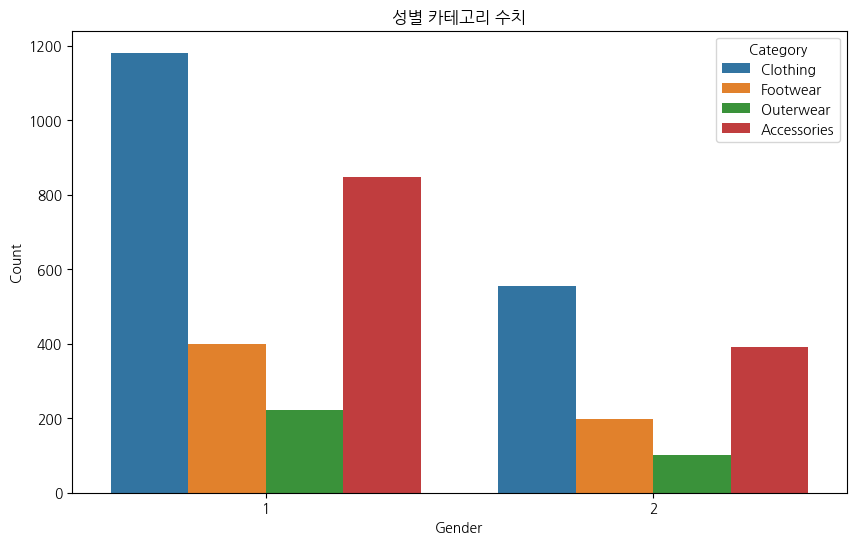

In [ ]:
# 연령별 성비의 비율 비슷
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender',hue='Category',order=df['Gender'].value_counts().index)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('성별 카테고리 수치')
plt.show()

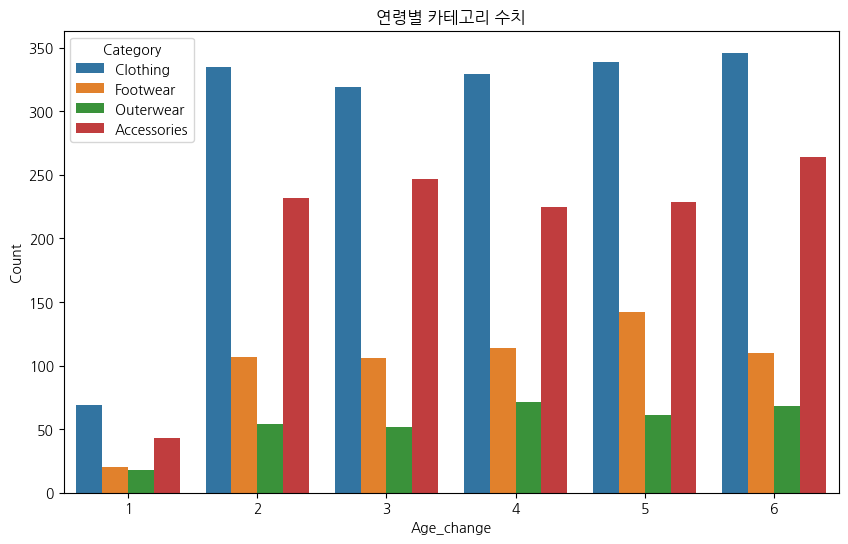

In [ ]:
# 연령별 카테고리 비율 비슷
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_change',hue='Category')
plt.xlabel('Age_change')
plt.ylabel('Count')
plt.title('연령별 카테고리 수치')
plt.show()

In [ ]:
# 연령별 성별 구매금액의 평균은 비슷

df.groupby(['Gender','Age_change'])['Purchase Amount (USD)'].mean().reset_index()

,Gender,Age_change,Purchase Amount (USD)
0,1,1,60.300971
1,1,2,59.386000
2,1,3,60.295918
3,1,4,58.807377
4,1,5,60.402647
5,1,6,58.653137
6,2,1,61.042553
7,2,2,61.982456
8,2,3,59.811966
9,2,4,57.876494


In [ ]:
df.groupby(['Category'])['Purchase Amount (USD)'].mean()

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

In [ ]:
df2 = df.groupby(['Age','Gender','Category'])['Purchase Amount (USD)'].sum()\
.reset_index()\
.sort_values(['Age','Gender','Purchase Amount (USD)'],ascending=[True,True,False])

In [ ]:
df2.drop_duplicates(['Age','Gender'],keep='first')

,Age,Gender,Category,Purchase Amount (USD)
1,1,1,Clothing,4724
5,1,2,Clothing,1464
9,2,1,Clothing,6763
13,2,2,Clothing,3270
17,3,1,Clothing,6443
21,3,2,Clothing,3538
25,4,1,Clothing,6815
29,4,2,Clothing,3146
33,5,1,Clothing,6127
37,5,2,Clothing,2795


In [ ]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,8,1,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,1,1,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,7,1,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,2,1,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,6,1,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,5,2,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,8,2,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,7,2,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,6,2,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [ ]:
df3 = df.groupby(['Age','Gender','Category','Item Purchased'])['Purchase Amount (USD)'].agg(['sum','count'])\
.reset_index()\
.sort_values(['Age','Gender','Category','sum'],ascending=[True,True,True,False])

In [ ]:
df3['sum_mean'] = round(df3['sum']/df3['count'],1)\
# .sort_values(['Age','Gender','Category','sum_mean'],ascending=[True,True,True,False])

In [ ]:
df3.sort_values(['Age','Gender','Category','sum_mean'],ascending=[True,True,True,False])

,Age,Gender,Category,Item Purchased,sum,count,sum_mean
1,1,1,Accessories,Belt,521,9,57.9
7,1,1,Accessories,Sunglasses,167,3,55.7
0,1,1,Accessories,Backpack,220,4,55.0
2,1,1,Accessories,Gloves,429,8,53.6
6,1,1,Accessories,Scarf,306,6,51.0
...,...,...,...,...,...,...,...
543,11,2,Footwear,Sneakers,139,2,69.5
542,11,2,Footwear,Shoes,266,4,66.5
541,11,2,Footwear,Sandals,136,4,34.0
545,11,2,Outerwear,Jacket,221,3,73.7
